In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import streamlit as st
from datetime import date

from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
stock = pd.read_csv('BBCA.JK.csv',  index_col=0)

df_stock = stock
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-08,175.0,180.0,175.0,177.5,103.276207,499150000
2004-06-09,177.5,182.5,175.0,180.0,104.730820,294290000
2004-06-10,180.0,180.0,177.5,180.0,104.730820,165590000
2004-06-11,177.5,180.0,177.5,180.0,104.730820,135830000
2004-06-14,180.0,180.0,175.0,177.5,103.276207,158540000


In [3]:
START = '2020-01-01'
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('BBCA.JK')
ihsg_data = load_data('^JKSE')
data.set_index(data.columns[0], inplace=True)
ihsg_data.set_index(data.columns[0], inplace=True)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.957031,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.105469,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518066,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.024902,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.944336,53692500
...,...,...,...,...,...,...
2024-10-03,10450.0,10525.0,10400.0,10450.0,10450.000000,60887000
2024-10-04,10400.0,10475.0,10350.0,10475.0,10475.000000,58500400
2024-10-07,10350.0,10375.0,10250.0,10300.0,10300.000000,91867900


In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

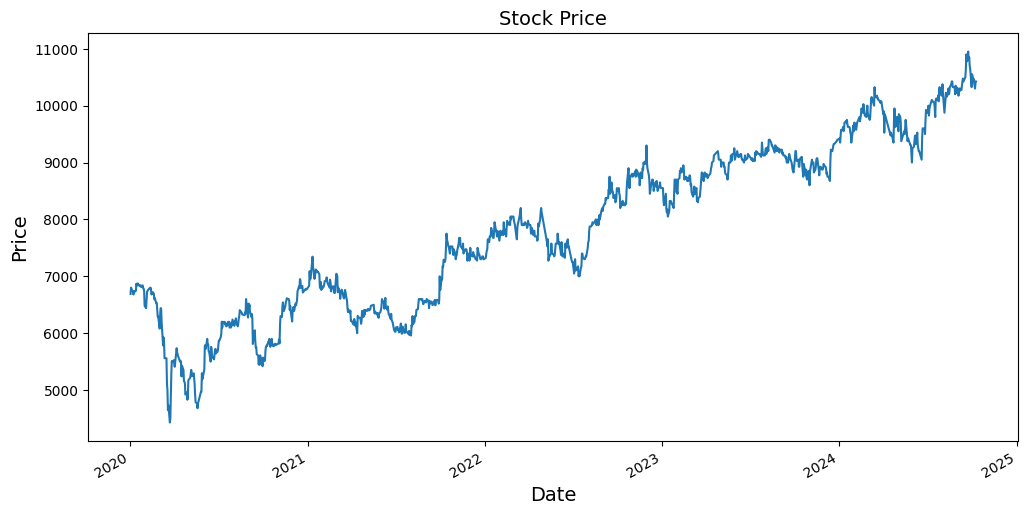

In [5]:
data['Close'].plot(figsize=(12, 6))
# ihsg_data['Close'].plot(figsize=(12,6))
plt.title("Stock Price", fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

Grafik ini menunjukkan kenaikan harga saham yang signifikan dari tahun 2004 hingga 2024, yang menunjukkan pertumbuhan keseluruhan meskipun ada beberapa fluktuasi jangka pendek. Penurunan besar sekitar tahun 2008 dan 2020 mencerminkan peristiwa ekonomi yang lebih luas seperti krisis keuangan dan pandemi COVID-19.

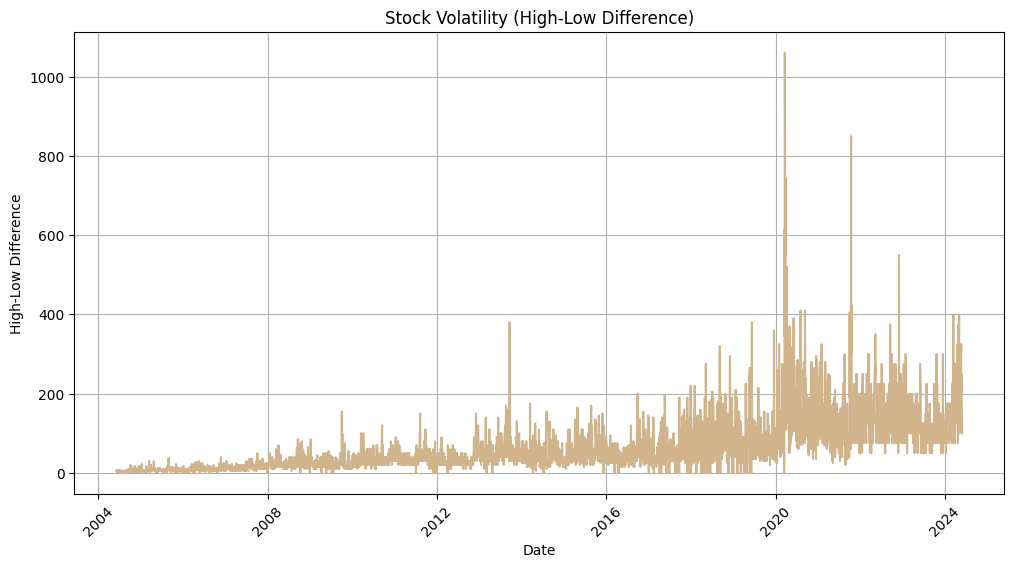

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

stock.index = pd.to_datetime(stock.index)

stock['High_Low_Diff'] = stock['High'] - stock['Low']

plt.figure(figsize=(12, 6))

plt.plot(stock.index, stock['High_Low_Diff'], label='High-Low Difference', color='tan')

plt.title('Stock Volatility (High-Low Difference)')
plt.xlabel('Date')
plt.ylabel('High-Low Difference')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

Grafik ini menunjukkan seberapa besar harga saham berfluktuasi setiap tahun. Semakin tinggi batangnya, semakin besar perbedaan antara harga tertinggi dan terendah tahun itu. Dalam istilah yang lebih sederhana, grafik ini menunjukkan seberapa fluktuatif atau "naik-turunnya" harga saham dari waktu ke waktu. High Low sangat berpengaruh terhadap waktu sehingga harga saham bisa diprediksi. 

<Axes: xlabel='Date'>

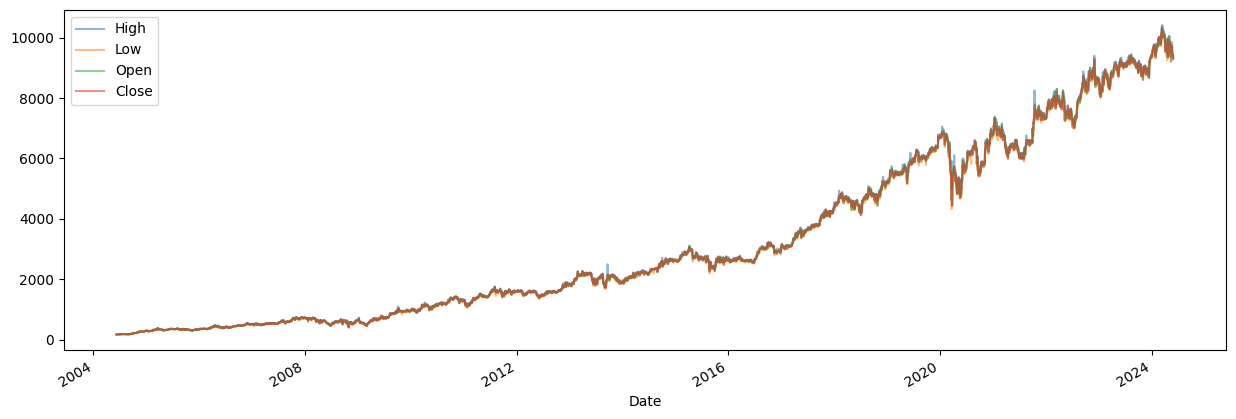

In [7]:
stock[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

Grafik ini menunjukkan harga saham harian. Garis biru menunjukkan harga pembukaan, dan garis hitam menunjukkan harga penutupan setiap hari. Area merah dan hijau di antaranya menunjukkan seberapa besar harga berfluktuasi sepanjang hari. Grafik ini seperti potret aktivitas saham dari waktu ke waktu, yang menunjukkan arah umum (naik atau turun) dan seberapa besar harga berfluktuasi (volatilitas) pada titik yang berbeda.

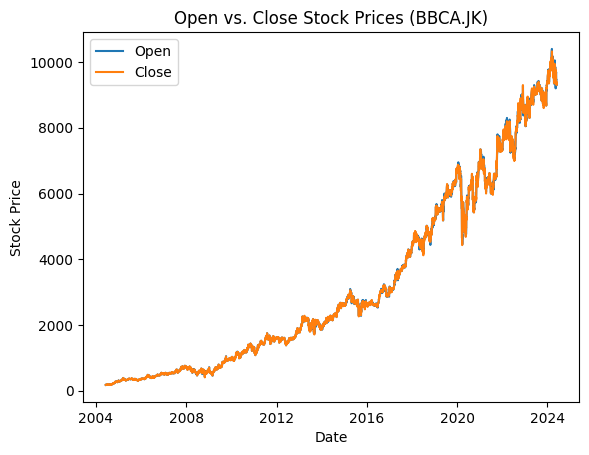

In [8]:
sns.lineplot(x="Date", y="Open", data=df_stock, label="Open")  
sns.lineplot(x="Date", y="Close", data=df_stock, label="Close")  

plt.xlabel("Date")  
plt.ylabel("Stock Price")  
plt.title("Open vs. Close Stock Prices (BBCA.JK)") 
plt.legend()  
plt.show()

Grafik ini seperti perlombaan antara harga pembukaan dan penutupan saham BBCA.JK setiap hari. Garis biru menunjukkan harga pembukaan, dan garis hitam menunjukkan harga penutupan. Anda dapat melihat apakah saham tersebut secara umum berakhir lebih tinggi atau lebih rendah dari awalnya dengan melihat garis mana yang berada di atas.

Preprocessing Data

In [9]:
df_stock.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
High_Low_Diff    0
dtype: int64

In [10]:
df_stock.shape

(4938, 7)

In [11]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume,High_Low_Diff
count,4938.000000,4938.000000,4938.000000,4938.000000,4938.000000,4.938000e+03,4938.00000
mean,3220.126063,3250.255164,3188.848724,3220.055691,2901.166182,1.076607e+08,61.40644
std,2783.220616,2805.158651,2761.241484,2782.810040,2689.961774,1.295921e+08,66.10290
min,175.000000,177.500000,175.000000,177.500000,103.276207,0.000000e+00,0.00000
25%,721.250000,730.000000,711.250000,725.000000,550.721237,4.921025e+07,20.00000
50%,2222.500000,2245.000000,2200.000000,2230.000000,1880.418030,7.308550e+07,40.00000
75%,5498.750000,5535.000000,5450.000000,5495.000000,4896.960938,1.170209e+08,80.00000
max,10400.000000,10400.000000,10150.000000,10325.000000,10092.431641,1.949960e+09,1060.00000


In [12]:
df_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'High_Low_Diff'], dtype='object')

<Axes: >

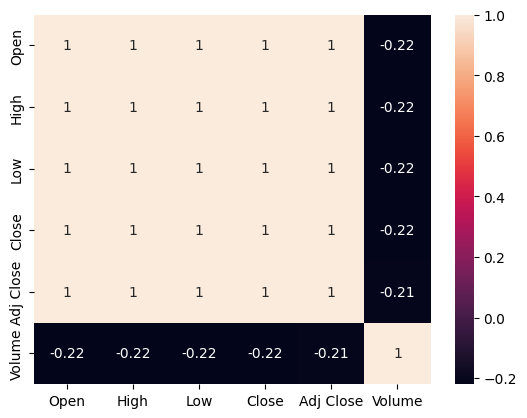

In [13]:
sns.heatmap(stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot = True)

In [14]:
stock.drop(columns = ['Volume'], inplace = True)

Create Train Test split from dataset
Train 70 : Test 30

In [15]:
def create_train_test_set(data):
    
    features = data.drop(columns=['Close'], axis=1)
    target = data['Close']
    

    data_len = data.shape[0]
    print("Stock Data length: ",str(data_len))

    train_size = int(data_len * 0.7)
    print("Training Set length: ",str(train_size))

    test_size = int(data_len * 0.3)
    test_index = train_size + test_size
    print("Test Set length: ",str(test_size))

    X_train, X_test = features[:train_size], features[train_size:test_index]
    y_train, y_test = target[:train_size], target[train_size:test_index]

    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = create_train_test_set(data)

Stock Data length:  1156
Training Set length:  809
Test Set length:  346
(809, 5) (346, 5)
(809,) (346,)


Model Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
print('R2_score:', r2_score(y_test, y_pred) * 100)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error::', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score: 96.48291897932732
Mean Absolute Error: 87.62525519766457
Mean Squared Error:: 9801.663627113938
Root Mean Squared Error(RMSE): 99.0033515953573


In [20]:
errors = abs(y_pred - y_test)

print('Mean Absolute Error using Linear Regression:', round(np.mean(errors), 2), 'degrees')
mape = 100 * (errors / y_test)
accuracyRF = 100 - np.mean(mape)
print('Accuracy Random Forest:', round(accuracyRF, 2), '%.')

Mean Absolute Error using Linear Regression: 87.63 degrees
Accuracy Random Forest: 99.08 %.


In [21]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = y_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2023-04-27,9150.0,9200.298688
1,2023-04-28,9050.0,9129.337647
2,2023-05-02,9050.0,9045.045020
3,2023-05-03,8925.0,8983.290653
4,2023-05-04,9000.0,9033.867707
...,...,...,...
341,2024-10-02,10500.0,10615.667409
342,2024-10-03,10450.0,10593.375745
343,2024-10-04,10475.0,10570.238903
344,2024-10-07,10300.0,10429.759647


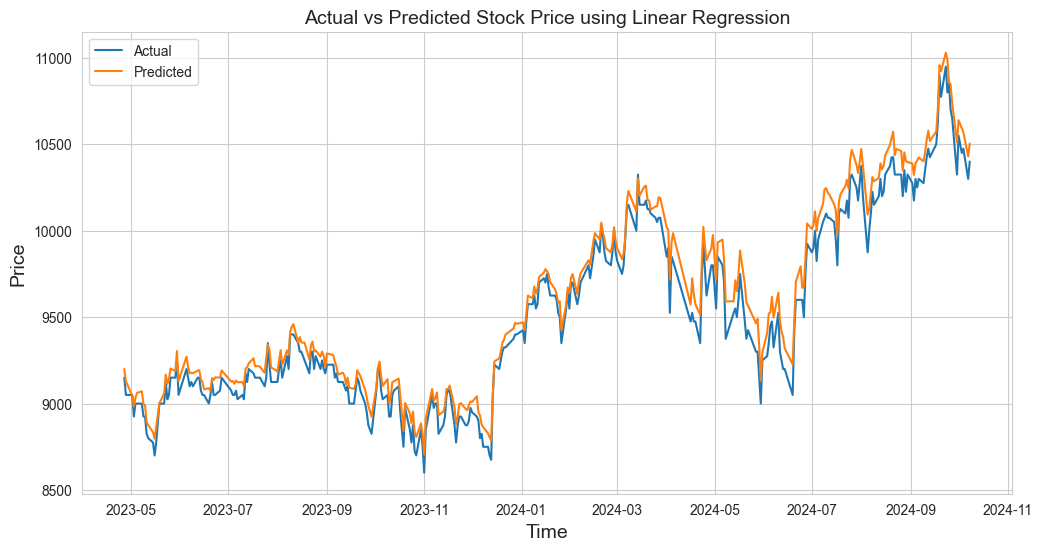

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Price using Linear Regression', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc='best')
plt.show()

Model Random Forest (Ensemble Model)

In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [24]:
Y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('R2_score:', r2_score(y_test, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error::', mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, Y_pred)))

R2_score: -0.3799894320873003
Mean Absolute Error: 423.2294075144509
Mean Squared Error:: 384585.7443370664
Root Mean Squared Error(RMSE): 620.149775729272


In [26]:
errors = abs(Y_pred - y_test)

print('Mean Absolute Error using Random Forest:', round(np.mean(errors), 2), 'degrees')
mape = 100 * (errors / y_test)
accuracyRF = 100 - np.mean(mape)
print('Accuracy Random Forest:', round(accuracyRF, 2), '%.')

Mean Absolute Error using Random Forest: 423.23 degrees
Accuracy Random Forest: 95.78 %.


In [27]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = Y_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2023-04-27,9150.0,9120.550
1,2023-04-28,9050.0,9057.100
2,2023-05-02,9050.0,9047.650
3,2023-05-03,8925.0,8996.425
4,2023-05-04,9000.0,8965.450
...,...,...,...
341,2024-10-02,10500.0,9154.150
342,2024-10-03,10450.0,9153.600
343,2024-10-04,10475.0,9153.600
344,2024-10-07,10300.0,9154.250


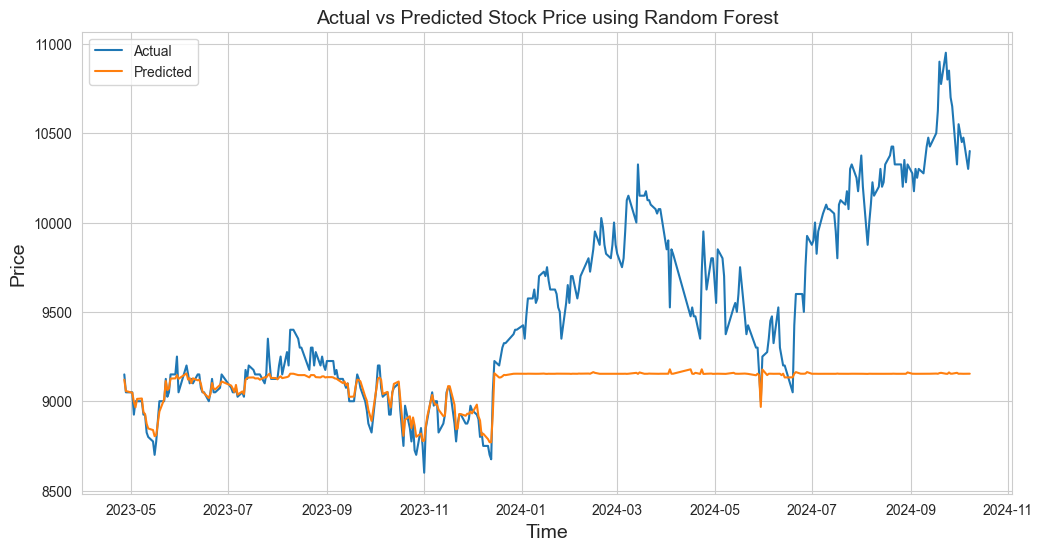

In [28]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Price using Random Forest', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc='best')
plt.show()

Model XGBoost

In [29]:
from xgboost import XGBRegressor

model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
prediction = model.predict(X_test)

In [31]:
print('R2_score:', r2_score(y_test, prediction))
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error::', mean_squared_error(y_test, prediction))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, prediction)))

R2_score: -0.3012891026415303
Mean Absolute Error: 414.16960011741327
Mean Squared Error:: 362652.9497259559
Root Mean Squared Error(RMSE): 602.2067333781281


In [32]:
errors = abs(prediction - y_test)

print('Mean Absolute Error using XgBoost:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)

accuracyXGB = 100 - np.mean(mape)
print('Accuracy XGBoost:', round(accuracyXGB, 2), '%.')

Mean Absolute Error using XgBoost: 414.17 degrees.
Accuracy XGBoost: 95.87 %.


In [33]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = prediction
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2023-04-27,9150.0,9118.240234
1,2023-04-28,9050.0,9166.648438
2,2023-05-02,9050.0,9128.148438
3,2023-05-03,8925.0,8989.356445
4,2023-05-04,9000.0,9016.702148
...,...,...,...
341,2024-10-02,10500.0,9169.333984
342,2024-10-03,10450.0,9175.083008
343,2024-10-04,10475.0,9170.259766
344,2024-10-07,10300.0,9179.032227


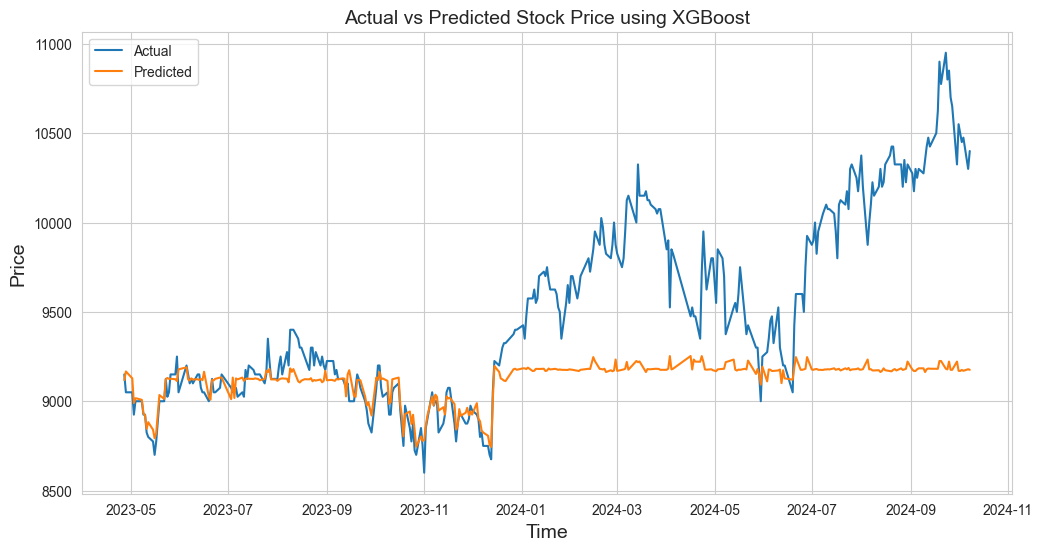

In [34]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Price using XGBoost', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc='best')
plt.show()